# I Reading dataset

## Dependancies

In [238]:
!pip install tensorflow opencv-python matplotlib

In [297]:
import tensorflow as tf
import os

In [298]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.expermental.set_memory_growth(gpu, True)

# 2 Removing Corrupted Images

In [357]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [358]:
data_dir = 'data'

In [359]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [361]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            #os.remove(image_path)

## Loading Data from dataset

In [362]:
tf.data.Dataset
# Using tensflow data api as it helps create data piplines

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [371]:
import numpy as np
from matplotlib import pyplot as plt

In [372]:
data = tf.keras.utils.image_dataset_from_directory('data')
# The keras data api helps build data pipeline and also preprocess data such as resizing images

Found 256 files belonging to 2 classes.


In [373]:
data_iterator = data.as_numpy_iterator()
# helps us asscess individual instances from the keras data pipeline

In [374]:
batch = data_iterator.next()
# grabbing a batch

In [375]:
len(batch)
# 2 parts to the dataset images and labels

2

In [376]:
# Images as numpy array
batch[0].shape

(32, 256, 256, 3)

In [377]:
# Happy people = class 0
# Sad people = class 1
batch[1]

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0])

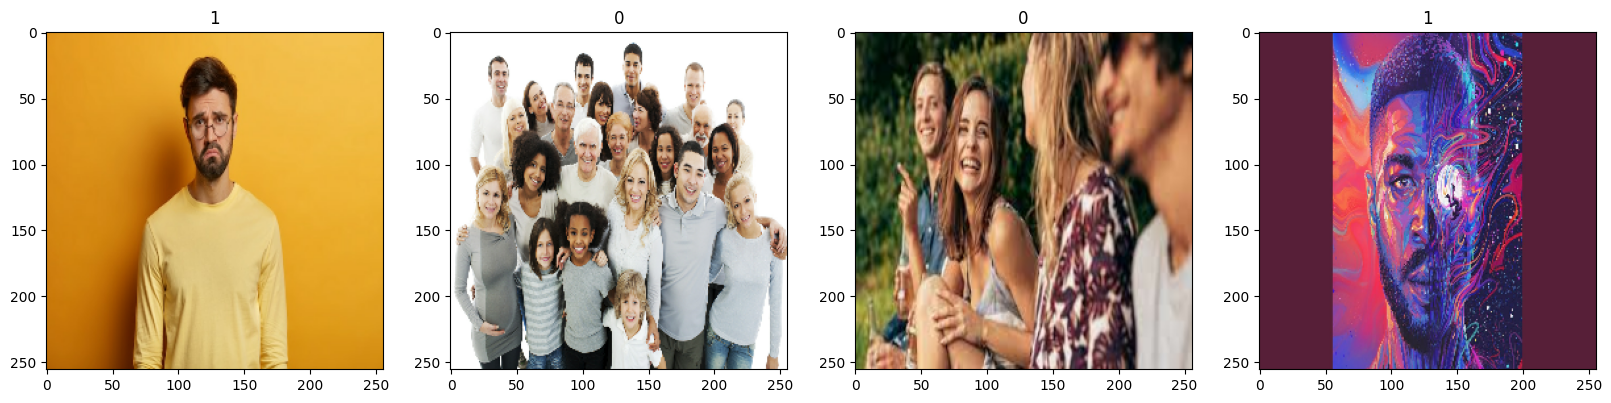

In [378]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [379]:
scaled = batch[0] / 255

In [380]:
scaled.max()

1.0

# II Data Preprocessing

## Scaling data

In [381]:
# we need data between 0-1 rather than 0-255 hence we scale the data by divinding it by 255.

data = data.map(lambda x,y: (x/255, y))

# the map function allows us to access the batch and preprocess it while the batch is loading.
# in the lambda function x = images and y = labels.

In [382]:
scaled_iterator = data.as_numpy_iterator()

In [383]:
batch = scaled_iterator.next()

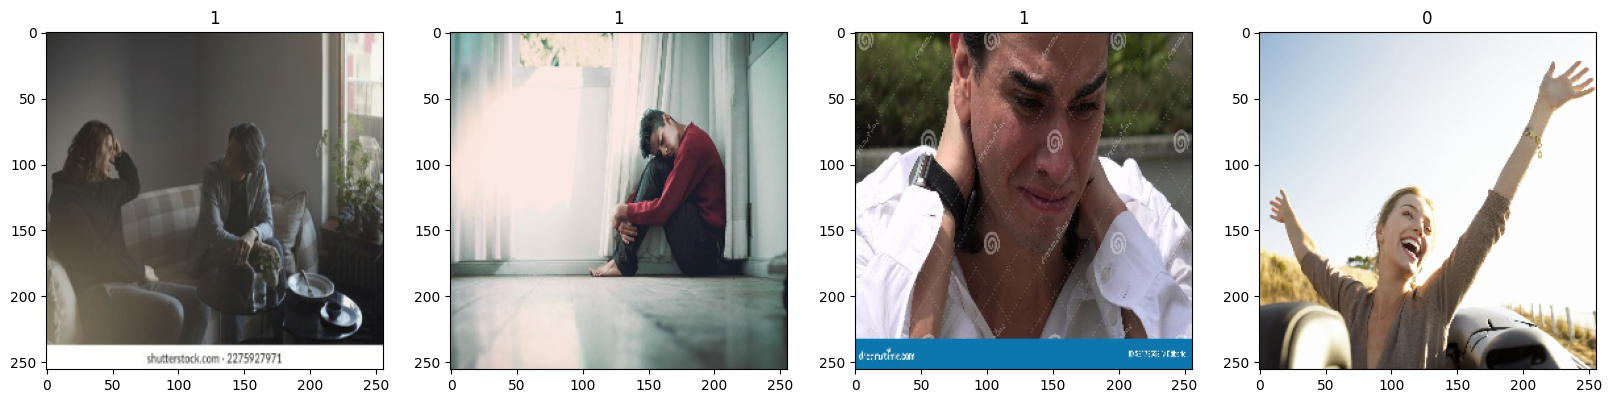

In [384]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## Spliting data

In [385]:
len(data)

8

In [386]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1) + 1

In [393]:
test_size

1

In [394]:
val_size + train_size  + test_size

7

In [395]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

# III Model

## Building the model

In [396]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [397]:
model = Sequential()

In [398]:
# Adding 16 filter with 3x3p and moving by 1px
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

# Adding 32 filter with 3x3p and moving by 1px
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
          
model.add(Flatten())
          
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [399]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [400]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 30, 30, 16)      

## Training the model

In [401]:
logdir='logs'

In [402]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [403]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
5/5 [==============================] - 10s 2s/step - loss: 1.0189 - accuracy: 0.5750 - val_loss: 1.0282 - val_accuracy: 0.3750
Epoch 2/20
5/5 [==============================] - 9s 2s/step - loss: 0.7787 - accuracy: 0.4812 - val_loss: 0.6867 - val_accuracy: 0.5000
Epoch 3/20
5/5 [==============================] - 9s 2s/step - loss: 0.6633 - accuracy: 0.6313 - val_loss: 0.6140 - val_accuracy: 0.6875
Epoch 4/20
5/5 [==============================] - 9s 2s/step - loss: 0.5918 - accuracy: 0.6687 - val_loss: 0.4694 - val_accuracy: 0.6562
Epoch 5/20
5/5 [==============================] - 9s 2s/step - loss: 0.5925 - accuracy: 0.6875 - val_loss: 0.4683 - val_accuracy: 0.8438
Epoch 6/20
5/5 [==============================] - 9s 2s/step - loss: 0.4755 - accuracy: 0.8313 - val_loss: 0.5459 - val_accuracy: 0.7500
Epoch 7/20
5/5 [==============================] - 9s 2s/step - loss: 0.3713 - accuracy: 0.8813 - val_loss: 0.3422 - val_accuracy: 0.9062
Epoch 8/20
5/5 [========================

## Plotting performace results 

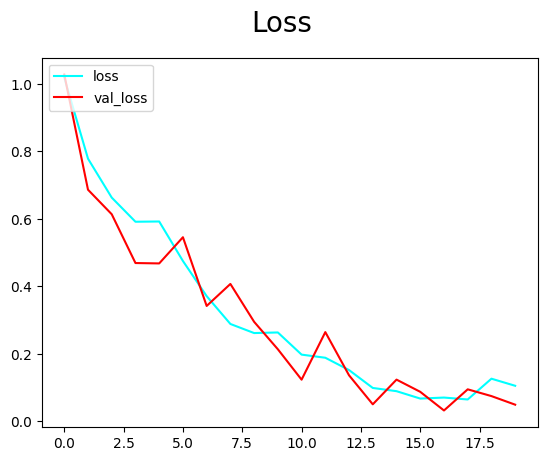

In [404]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='cyan', label='loss')
plt.plot(hist.history['val_loss'], color='red', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

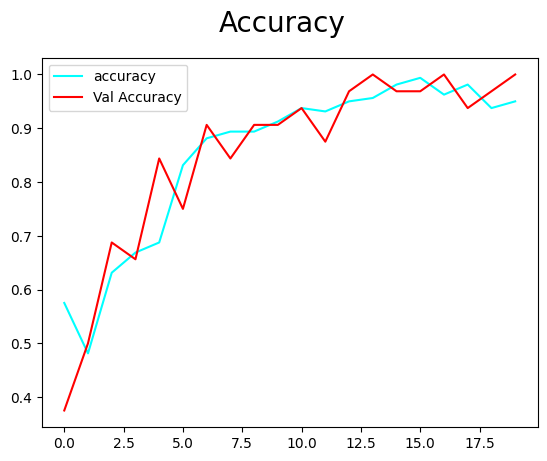

In [405]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='cyan', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='red', label='Val Accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# IV Evalutaing the model

## Evaulate

In [406]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [417]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [418]:
len(test)

1

In [419]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 245ms/step


In [421]:
print(f'Precision:{pre.result().numpy()}  Recall:{re.result().numpy()}  Accuracy{acc.result().numpy()}')

Precision:1.0  Recall:1.0  Accuracy1.0


## Testing using other data

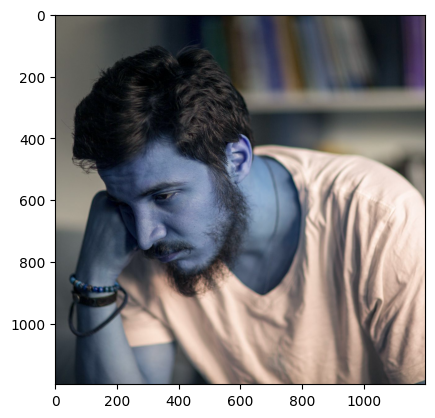

In [450]:
# reading in a random image from google
img = cv2.imread('sadtest.jpg')
plt.imshow(img)
plt.show()

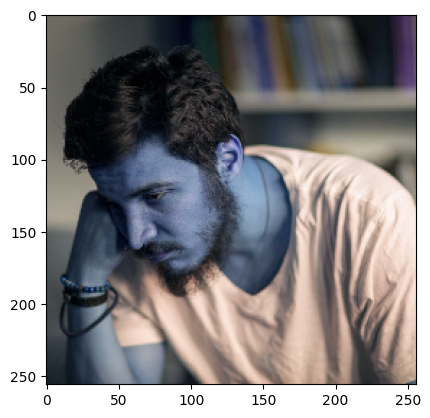

In [451]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [452]:
resize.shape

TensorShape([256, 256, 3])

In [453]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [454]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 28ms/step


In [455]:
yhat

array([[0.99848723]], dtype=float32)

In [456]:
if yhat > 0.5:
    print(f' Predicted class is Sad')
else:
    print(f' Predicted class is Happy')

 Predicted class is Sad


# Saving the model

In [458]:
from tensorflow.keras.models import load_model

In [459]:
model.save(os.path.join('models','emotion-HS-model.h5'))

In [460]:
newModel = load_model(os.path.join('models', 'emotion-HS-model.h5'))

In [461]:
newModel

In [462]:
yhatNew = newModel.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 82ms/step


In [463]:
if yhat > 0.5:
    print(f' Predicted class is Sad')
else:
    print(f' Predicted class is Happy')

 Predicted class is Sad
